In [1]:
# For ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

# Importing tha data
import pandas as pd
dataset = pd.read_csv('Diabetes data.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
dataset.isnull().sum() # For null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
x = dataset.iloc[:,:-1]  # Data except last column
y = dataset.iloc[:,-1] # last column in data
x.head()  # First n rows of the dataset or 5 by default

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
y.head() 

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [5]:
dataset.corr() # Calculating the relationship between each column in dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

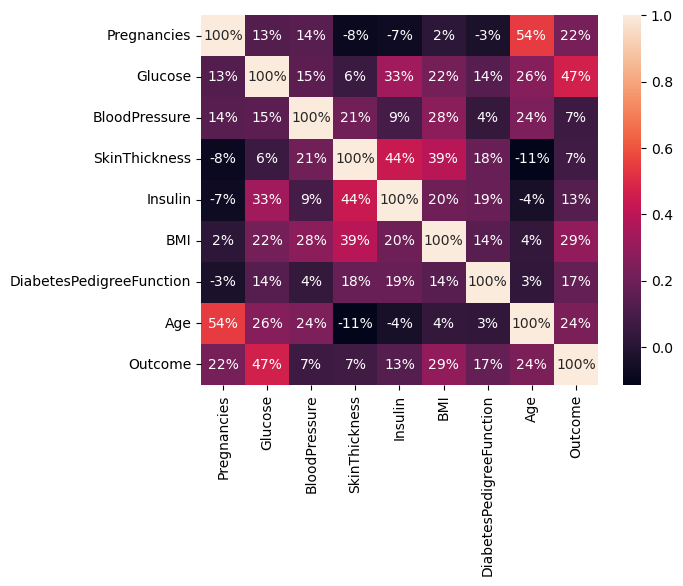

In [6]:
import seaborn as sns
sns.heatmap(dataset.corr(),fmt ='.0%',annot = True)            # colored visual summary of information

(array([86., 75., 53., 26., 15.,  9.,  0.,  1.,  1.,  2.]),
 array([0.088 , 0.3212, 0.5544, 0.7876, 1.0208, 1.254 , 1.4872, 1.7204,
        1.9536, 2.1868, 2.42  ]),
 <BarContainer object of 10 artists>)

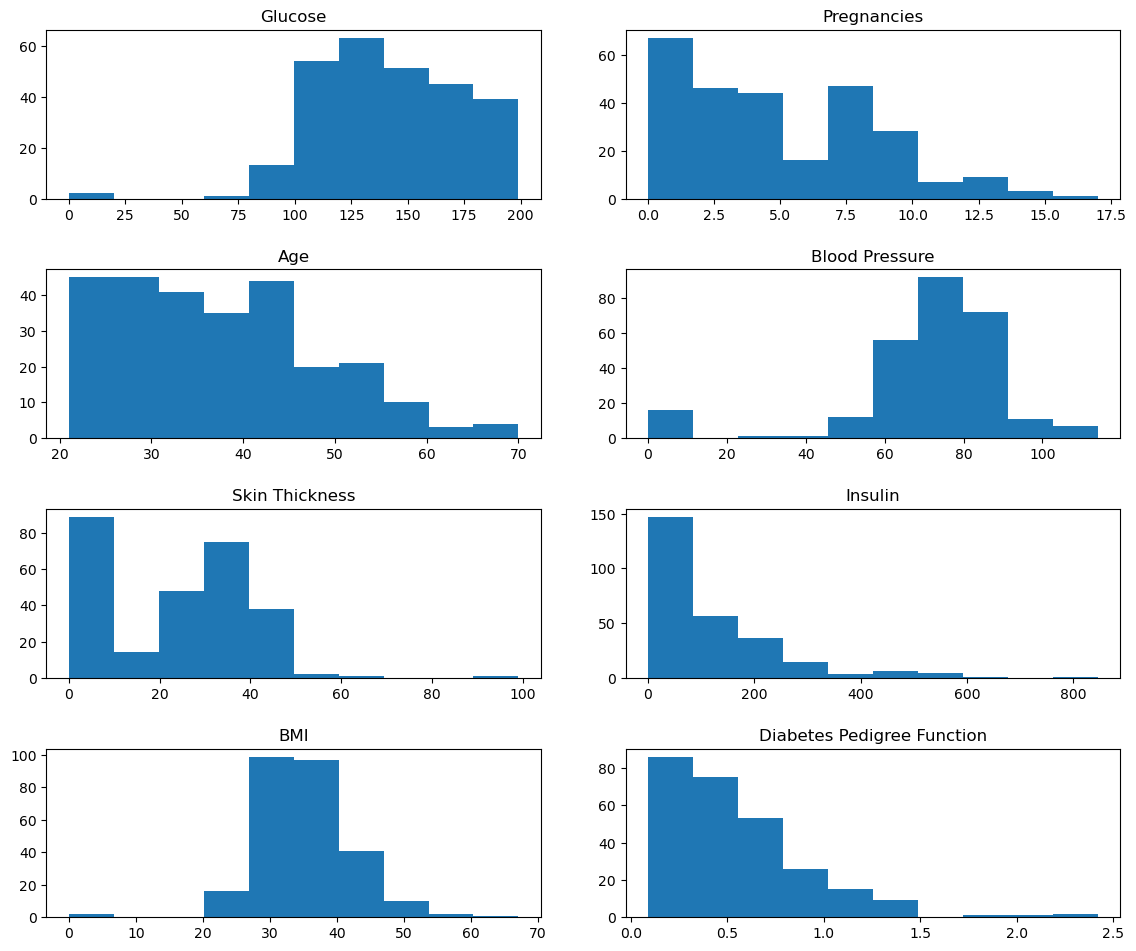

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(dataset.Glucose[dataset.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(dataset.Pregnancies[dataset.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(dataset.Age[dataset.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(dataset.BloodPressure[dataset.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(dataset.SkinThickness[dataset.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(dataset.Insulin[dataset.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(dataset.BMI[dataset.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(dataset.DiabetesPedigreeFunction[dataset.Outcome==1])

<AxesSubplot:xlabel='Outcome', ylabel='count'>

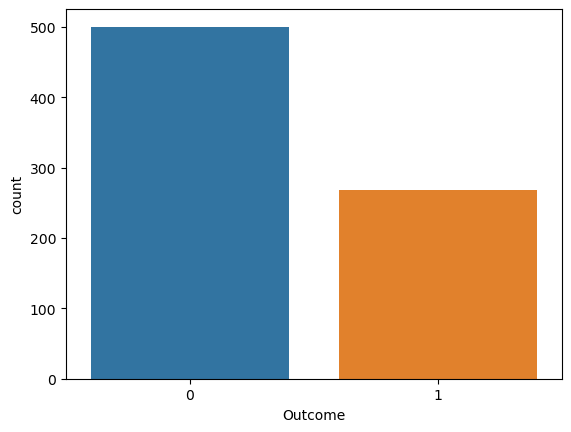

In [8]:
sns.countplot(dataset['Outcome'])  # Implementing Observational count for outcome

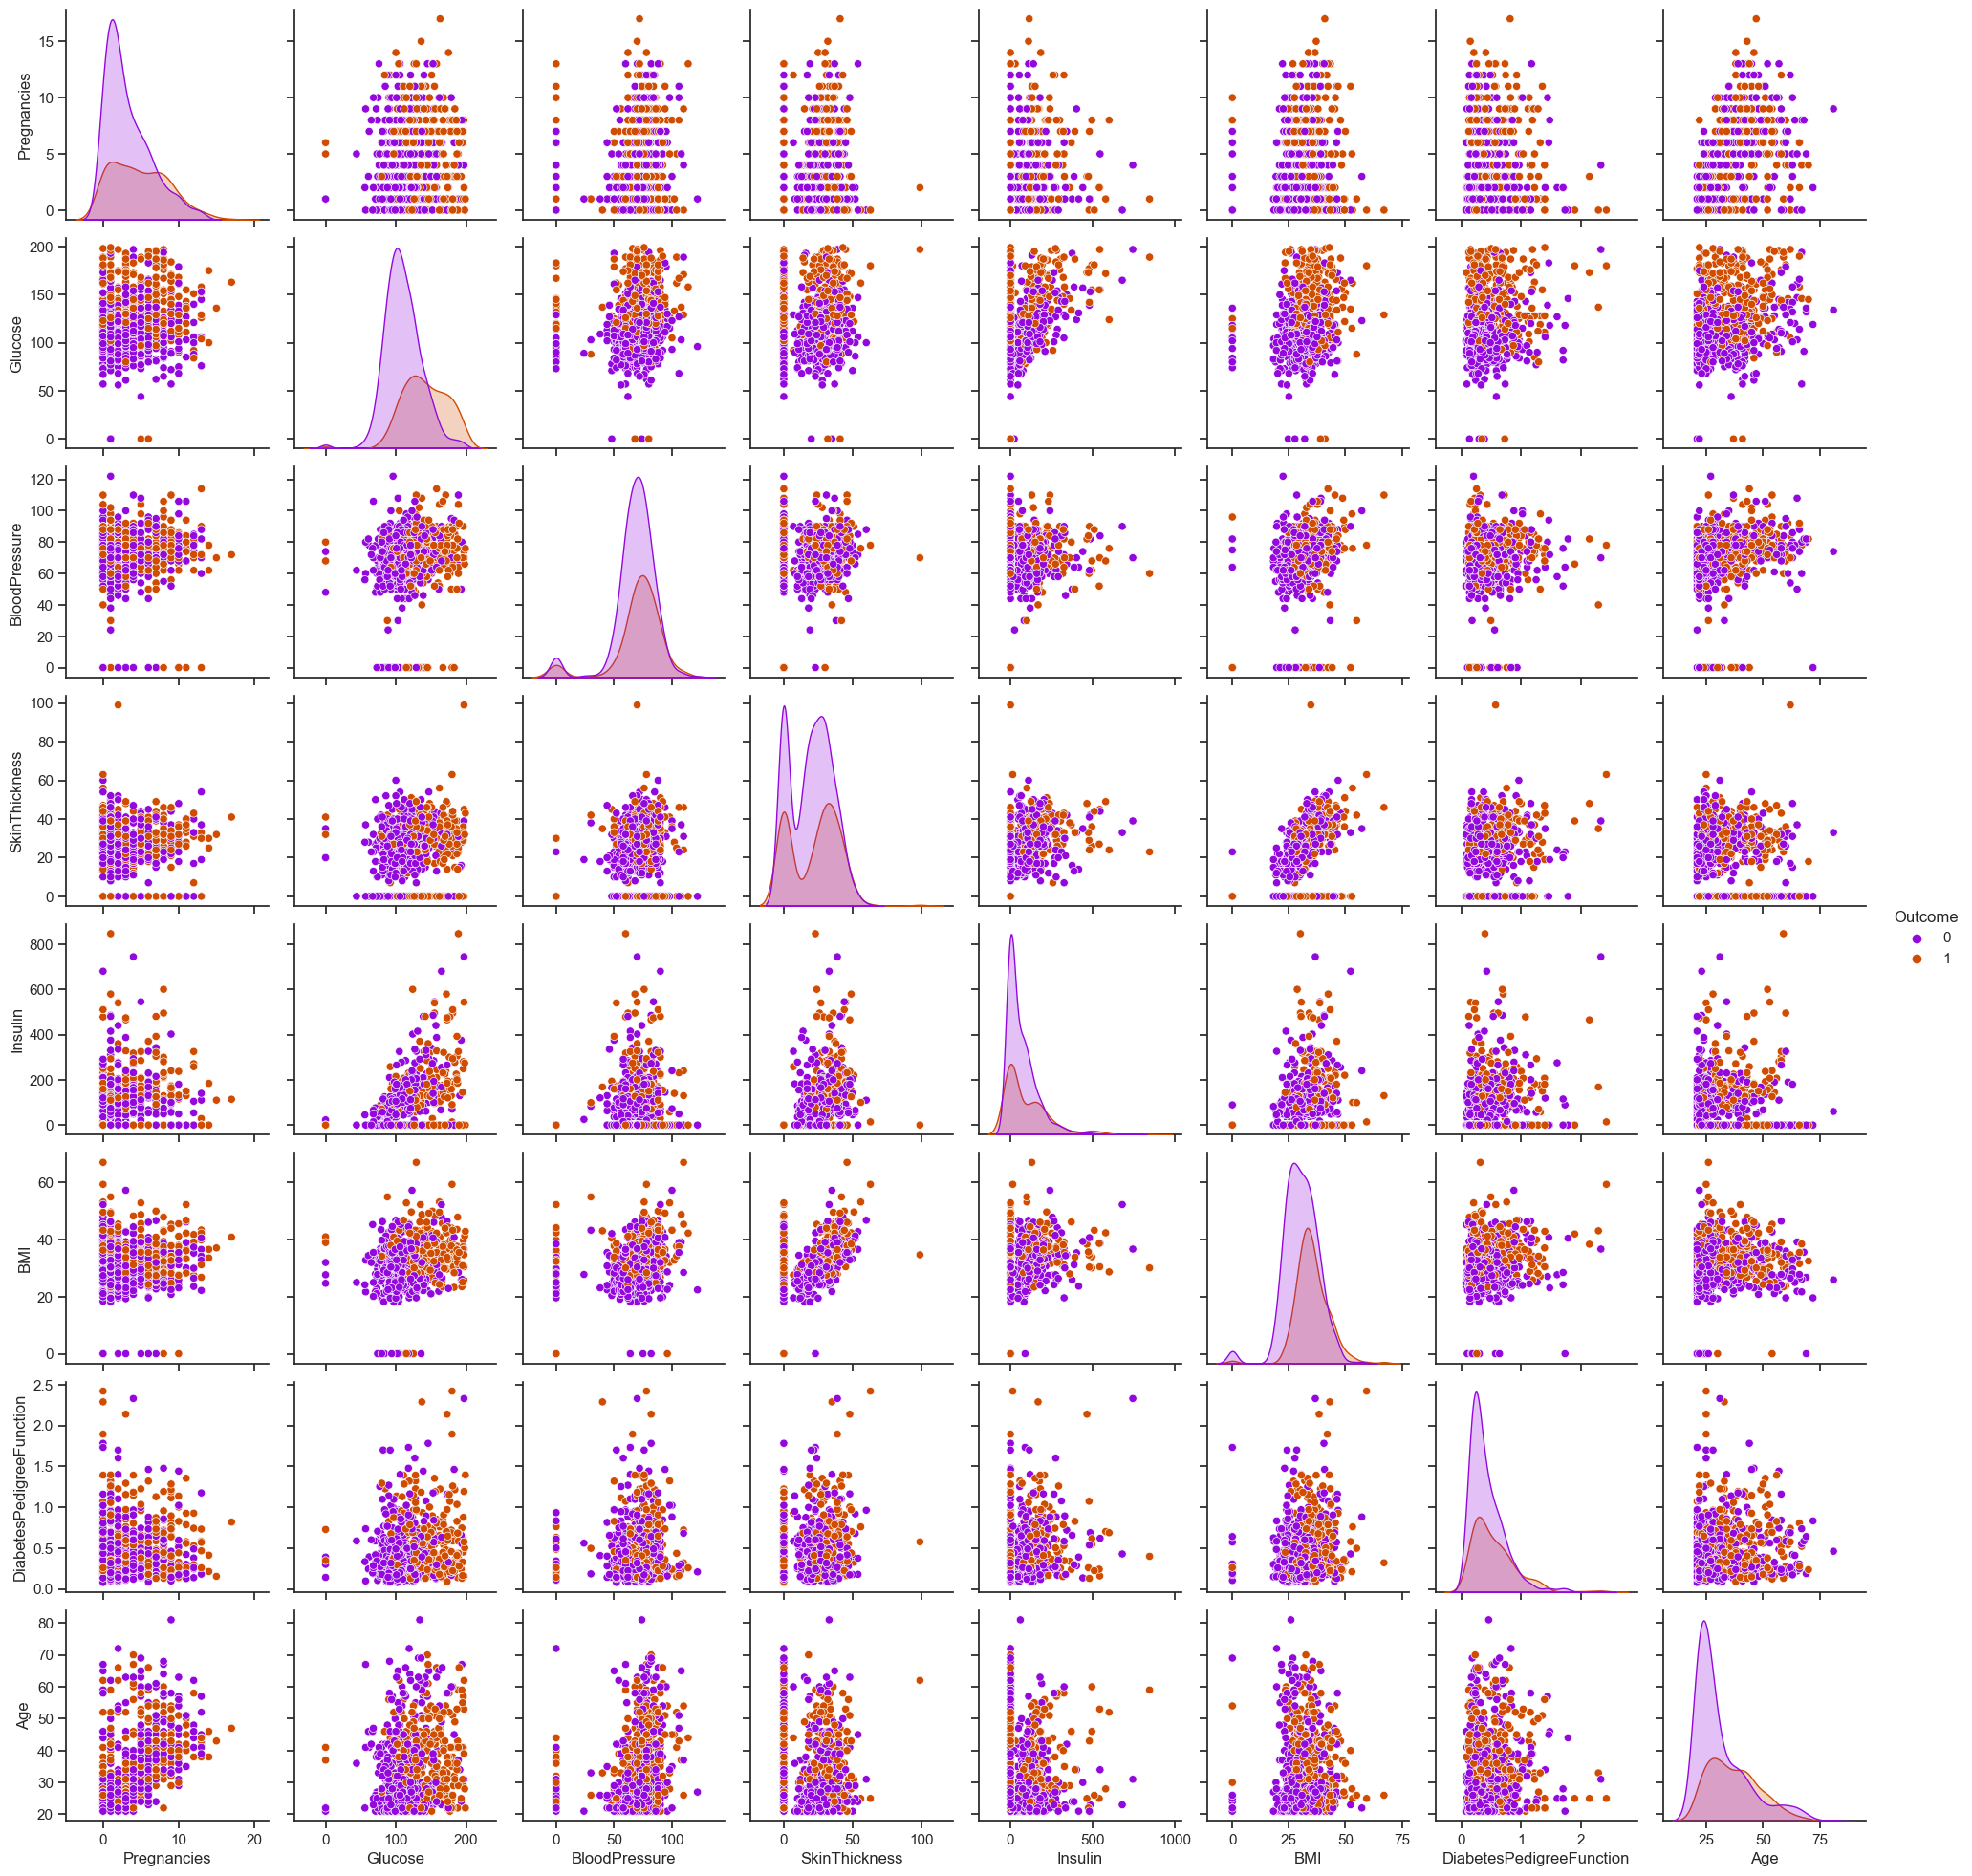

In [9]:
## Pairplotting of dataframe
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(dataset,hue='Outcome',palette='gnuplot');

In [10]:
# For training and testing of model

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

In [11]:
# K nearest neighbor model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(x_train,y_train)
predict1 = knn.predict(x_test)
predict1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [12]:
y_test # Testing data of y

195    1
742    0
496    0
301    1
612    1
      ..
333    0
201    0
11     1
393    0
494    0
Name: Outcome, Length: 77, dtype: int64

In [13]:
# For counting mis-classifies values

count_missclassified1 = (y_test!=predict1).sum()
count_missclassified1

16

In [14]:
# For finding the accuracy

from sklearn import metrics
accuracy1 = metrics.accuracy_score(y_test,predict1)
accuracy1*100

79.22077922077922

In [15]:
# Clssification report

c_f1 = metrics.classification_report(y_test,predict1)
print(c_f1)

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        50
           1       0.87      0.48      0.62        27

    accuracy                           0.79        77
   macro avg       0.82      0.72      0.74        77
weighted avg       0.81      0.79      0.77        77



Precision Call = (True Positive) / (True Positive + False Positive)

Recall = (True Positive) / (True Positive + False Negative)

F1-Score = (2 * Precision * Recall) / (Precision + Recall)

In [16]:
# Testing with the value

n = [[4,52,12,47,0,52,125,74]]
pred1 = knn.predict(n)
pred1

array([0], dtype=int64)

In [17]:
# Analysing with Logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=20,penalty='l2')
lr.fit(x_train,y_train)
predict2 = lr.predict(x_test)
predict2

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [18]:
# Counting mis-classified values for logistic regression

count_missclassified2 = (y_test!=predict2).sum()
count_missclassified2

14

In [19]:
# For finding the accuracy

accuracy2 = metrics.accuracy_score(y_test,predict2)
accuracy2*100

81.81818181818183

In [20]:
# Evaluating classification report
c_r2 = metrics.classification_report(y_test,predict2)
print(c_r2)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        50
           1       0.84      0.59      0.70        27

    accuracy                           0.82        77
   macro avg       0.83      0.77      0.78        77
weighted avg       0.82      0.82      0.81        77



In [21]:
# Testing with the values

n = [[4,52,12,47,0,52,125,74]]
pred2 = lr.predict(n)
pred2

array([1], dtype=int64)

In [22]:
#Random Forest Algo

from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 7,criterion = 'entropy',max_features = 5,random_state=20) #random forest model
rf.fit(x_train,y_train)
predict3 = rf.predict(x_test) #prediction
predict3

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [23]:
# Counting mis-classified values for logistic regression

count_missclassified3 = (y_test!=predict3).sum()
count_missclassified3

16

In [24]:
accuracy3 = metrics.accuracy_score(y_test,predict3)
accuracy3*100

79.22077922077922

In [25]:
# Evaluating classification report
c_r3 = metrics.classification_report(y_test,predict3)
print(c_r3)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        50
           1       0.79      0.56      0.65        27

    accuracy                           0.79        77
   macro avg       0.79      0.74      0.75        77
weighted avg       0.79      0.79      0.78        77



In [26]:
# Testing with the values

n = [[4,52,12,47,0,52,125,74]]
pred3 = rf.predict(n)
pred3

array([0], dtype=int64)

In [27]:
# support vector machine
from sklearn import svm 
#svc-> classificational algorithm

model = svm.SVC(probability=True)
model.fit(x_train,y_train)
predict4=model.predict(x_test)
predict4

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [28]:
# Counting mis-classified values for Decision Tree Algorithm

count_missclassified4 = (y_test != predict4).sum()
count_missclassified4

13

In [29]:
accuracy4=metrics.accuracy_score(y_test,predict4)
accuracy4*100

83.11688311688312

In [30]:
# Clssification report

c_r4 = metrics.classification_report(y_test,predict4)
print(c_r4)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        50
           1       0.94      0.56      0.70        27

    accuracy                           0.83        77
   macro avg       0.87      0.77      0.79        77
weighted avg       0.85      0.83      0.82        77



In [31]:
# Testing with the values

n = [[4,52,12,47,0,52,125,74]]
pred4 = model.predict(n)
pred4

array([0], dtype=int64)

In [32]:
# Using Decision Tree model

from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=1,min_samples_split=7)
dtree.fit(x_train,y_train)
predict5 = dtree.predict(x_test)
predict5

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [33]:
# Counting mis-classified values for Decision Tree Algorithm

count_missclassified5 = (y_test != predict5).sum()
count_missclassified5

14

In [34]:
# Finding the accuracy

accuracy5 = metrics.accuracy_score(y_test,predict5)
accuracy5*100

81.81818181818183

In [35]:
# Clssification report

c_r5 = metrics.classification_report(y_test,predict5)
print(c_r5)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        50
           1       0.72      0.78      0.75        27

    accuracy                           0.82        77
   macro avg       0.80      0.81      0.80        77
weighted avg       0.82      0.82      0.82        77



In [36]:
# Testing with the values

n = [[4,52,12,47,0,52,125,74]]
pred5 = dtree.predict(n)
pred5

array([0], dtype=int64)

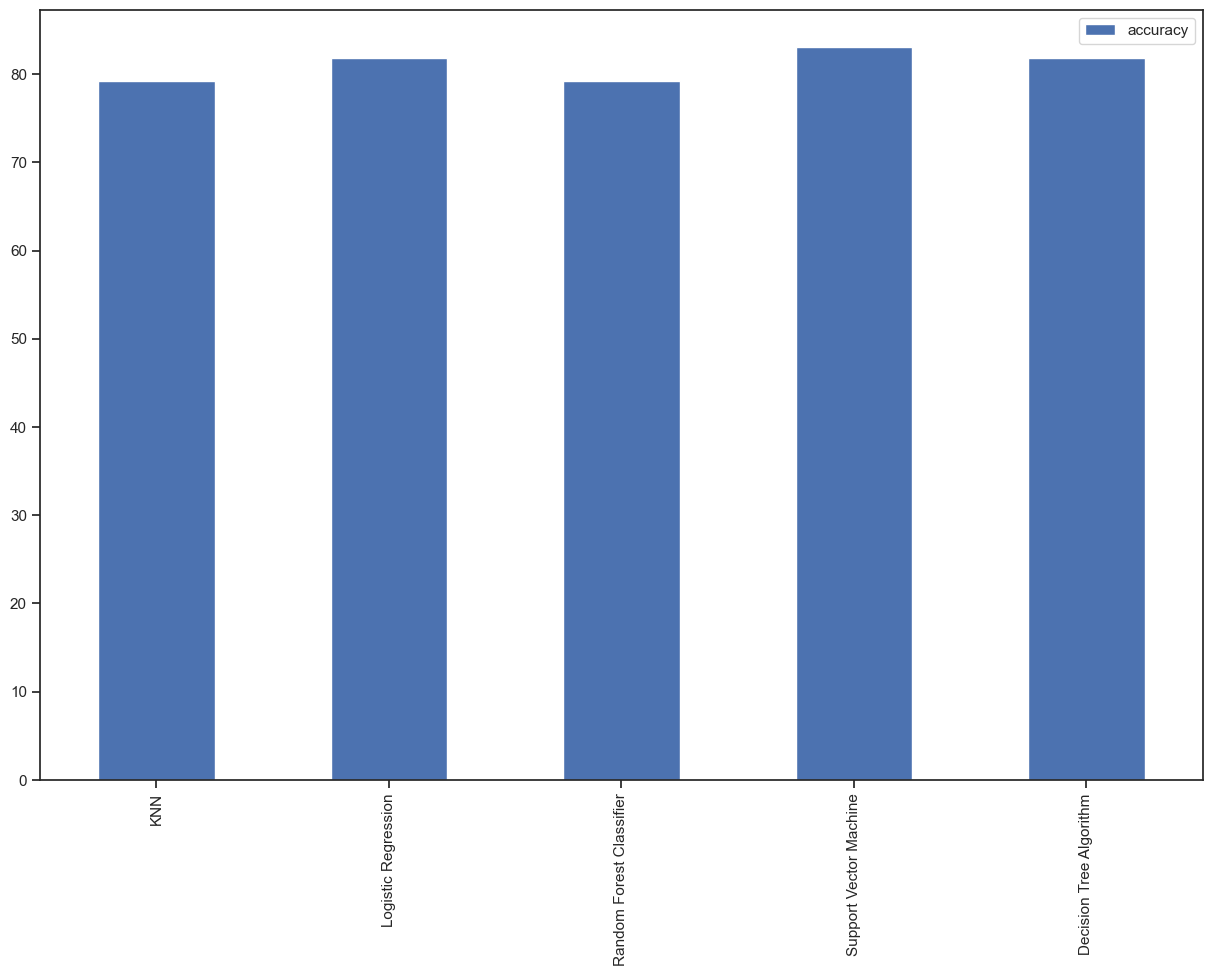

In [37]:
import pandas as pd
model_compare = pd.DataFrame({"KNN":accuracy1*100,
"Logistic Regression":accuracy2*100,
"Random Forest Classifier":accuracy3*100,
"Support Vector Machine":accuracy4*100,
"Decision Tree Algorithm":accuracy5*100,},
index=["accuracy"])
model_compare.T.plot.bar(figsize=(15,10));

In [40]:
# Hypertuning
from sklearn.model_selection import GridSearchCV
import numpy as np
lr_params = [{'C': np.logspace(-4,4,30), "solver":["liblinear"]}]
clf = GridSearchCV(lr,lr_params,cv = 5,verbose=True) #grid search cv model creation 
clf.fit(x_train,y_train)
score=clf.score(x_test,y_test)
print(score*100)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
83.11688311688312


In [41]:
y_prediction=clf.predict(x_test)
y_prediction

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

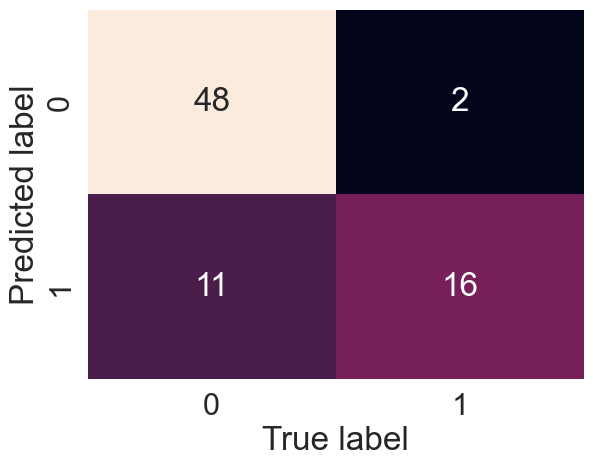

In [42]:
sns.set(font_scale=2)
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_prediction), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [43]:
# from sklearn.metrics import accuracy_score
print(metrics.accuracy_score(y_test,y_prediction))

0.8311688311688312


In [44]:
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        50
           1       0.89      0.59      0.71        27

    accuracy                           0.83        77
   macro avg       0.85      0.78      0.80        77
weighted avg       0.84      0.83      0.82        77



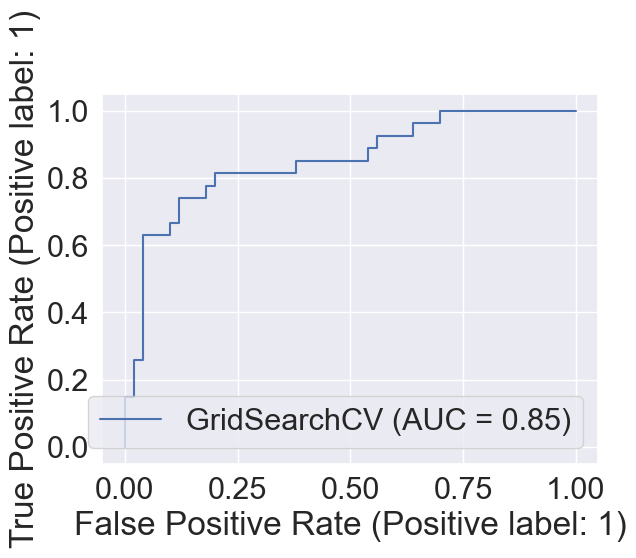

In [45]:
metrics.plot_roc_curve(clf,x_test,y_test)

In [46]:
import pickle
# Save trained model to file
pickle.dump(clf, open("Diabetes.pkl", "wb"))
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(x_test)
loaded_model.score(x_test,y_test)
#######OUTPUT########


0.8311688311688312